In [20]:
import pickle
import numpy as np

In [21]:
with open('embeddings_all.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [22]:
# normalize embeddings
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [23]:
embeddings = np.array(x)

In [24]:
# do PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit(embeddings)

pca_transform = pca.transform(embeddings)

In [25]:
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

print(len(fine_labels))

100


In [26]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(np.mean(pca_transform[y == i], axis=0))
    labels.append(i)

print(len(centroids))
print(labels)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


(100, 2)


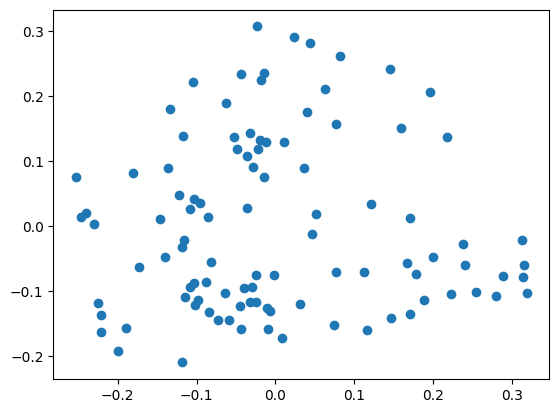

In [27]:
## do PCA on the centroids

pca_centroids = PCA(n_components=2)
pca_centroids.fit(centroids)

pca_centroids_transform = pca_centroids.transform(centroids)

print(pca_centroids_transform.shape)

# plot the centroids

import matplotlib.pyplot as plt

plt.scatter(pca_centroids_transform[:,0], pca_centroids_transform[:,1])
plt.show()

In [28]:

clusters = {}
parents = {}
curr_points = np.array(centroids.copy())
curr_labels = labels.copy()

for i in range(10):

    # calculate distances from the first centroid
    distances = np.linalg.norm(curr_points - curr_points[i], axis=1)

    # sort the distances and get the indices
    sorted_distances = np.argsort(distances)
    print("sorted", sorted_distances)

    # add to the cluster the 10 closest points but not itself
    clusters[i] = curr_points[sorted_distances.astype(int)[:10]]
    #print(clusters[i])    
    parents[i] = (np.array(curr_labels)[sorted_distances])[:10]
    print(parents[i])

    # delete the points from the list
    curr_points = np.delete(curr_points, sorted_distances[:10], axis=0)
    curr_labels = np.delete(curr_labels, sorted_distances[:10], axis=0)

    # add the new point to the list
    #curr_points = np.vstack((curr_points, new_point_mean))
    print(curr_points.shape)



sorted [ 0 57 83 53 10 92 61 22 77 70 55 40 65 51 50 72  4 80 32  3 84 97 66 38
  7 34 16 94 71 64 45 28 23 79  9 63 26 88  2 37 62 74 91 67 75 58 25 42
 43 96 82 56 36 29 18 73 47 69 99 15 54 33 11 24 17 44 89 78 35  1 87 60
 19 93 95  5 46 30 81 31 14 98 41 59 90 52 39 20 21 13 12 27 85 49  8 86
  6 68 76 48]
[ 0 57 83 53 10 92 61 22 77 70]
(90, 100)
sorted [ 1  9 32 88 43 29 59 33 47 22 42 75 41 37 58 72 51 70 65 23 50 48 57  4
 83 12 38 56 36 82  3  0 35 31  7 60  2 61 71 87 26 67 14 13 11 68 39 89
 18 19  6 79 24  8 77 66 80 16 25 73 78  5 40 53 17 45 81 21 74 27 34 84
 63 20 28 30 44 85 10 54 76 64 15 46 86 62 55 52 69 49]
[ 2 11 35 98 46 32 65 36 50 25]
(80, 100)
sorted [ 2 43 58 56 49  1 63 21 50 74 51 29 17 52 23 33 35 25 59 34 24 40 11 26
 27 78 76 20 73 36  5 72 62  0 57 46 10  4 15 77 61 14 70 19 65 66  8 31
 41 28 44 37 39 64 30 71 69 67 12 18 55  9 68 75 79 22 16  7  6 48 13 32
 53 45  3 38 60 47 54 42]
[ 4 55 74 72 63  3 80 27 64 93]
(70, 100)
sorted [ 3 17 54  2  8 12 3

In [29]:
print(parents)

{0: array([ 0, 57, 83, 53, 10, 92, 61, 22, 77, 70]), 1: array([ 2, 11, 35, 98, 46, 32, 65, 36, 50, 25]), 2: array([ 4, 55, 74, 72, 63,  3, 80, 27, 64, 93]), 3: array([ 7, 24, 79,  6, 14, 18, 44, 26, 45, 82]), 4: array([12, 37, 90, 17, 76, 68, 85, 81, 69, 71]), 5: array([15, 19, 31, 38, 29, 43, 34, 97, 66, 84]), 6: array([20,  5, 94, 40, 87, 91, 39, 86, 99, 28]), 7: array([30, 95, 73, 67, 23, 49,  1, 75, 56, 59]), 8: array([47, 52, 96, 33, 60, 62, 51, 42, 88, 13]), 9: array([89, 58, 41, 48,  8, 78, 21,  9, 16, 54])}


In [31]:
reverse = {}

for key in parents.keys():
    for i in range(len(parents[key])):
        reverse[parents[key][i]] = key

print(reverse)


{0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9}


In [135]:
# for each embedding fint the closest centroid

a = np.zeros((10,100))


for i, x in enumerate(pca_transform):
    distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]
    print(first_index)    
    a[reverse[first_index]][y[i]] += 1

    

15
3
88
41
52
59
17
30
12
16
38
46
31
99
27
7
12
68
67
98
10
86
35
26
12
81
8
16
54
92
58
85
1
60
73
56
76
82
34
63
80
54
2
98
20
17
89
30
39
29
4
69
4
44
57
44
56
65
74
15
36
83
89
25
46
40
82
53
55
33
81
21
43
17
16
84
14
15
54
28
53
71
60
24
54
4
4
7
24
87
69
45
2
50
11
92
3
88
49
17
95
13
24
10
93
35
66
65
2
55
64
12
79
79
32
58
15
87
45
98
27
95
86
96
33
75
40
74
57
35
91
5
6
71
92
80
26
21
54
5
8
71
54
64
15
14
74
44
71
80
69
51
82
63
83
96
11
97
91
75
7
90
77
74
46
23
57
51
94
72
43
58
63
31
98
8
52
22
98
76
83
73
75
0
30
64
20
31
21
1
34
52
58
37
69
16
26
40
94
21
71
36
57
30
60
77
48
70
66
21
56
85
39
90
90
59
49
77
73
24
6
14
85
20
30
60
56
19
71
8
2
31
96
94
0
86
62
47
34
27
68
44
15
68
8
35
15
94
37
77
24
1
26
9
70
39
57
66
43
15
74
33
51
88
60
59
32
44
39
53
95
25
23
48
89
61
1
33
50
62
31
80
35
70
8
29
79
88
7
73
6
73
0
48
13
37
0
67
58
82
61
81
39
52
14
82
20
68
41
88
59
34
96
80
28
4
67
59
20
67
89
46
81
32
17
5
3
72
99
76
43
56
22
49
62
50
2
48
56
19
60
21
57
79
24
64


In [134]:
print(y.shape)
print(np.max(y))

(49984,)
99


In [10]:
## do PCA on the centroids

pca_centroids = PCA(n_components=2)
pca_centroids.fit(centroids)

pca_centroids_transform = pca_centroids.transform(centroids)

print(pca_centroids_transform.shape)

# plot the centroids

import matplotlib.pyplot as plt

# color each centroid with the color of the parent cluster

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'grey']

for i in range(100):
    plt.scatter(pca_centroids_transform[i,0], pca_centroids_transform[i,1], color=colors[reverse[i]])

plt.show()

(100, 2)


NameError: name 'reverse' is not defined

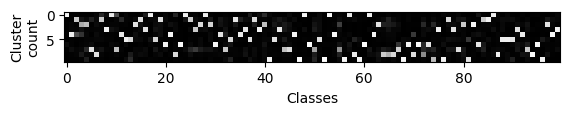

In [139]:

import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(a,cmap='Greys_r')

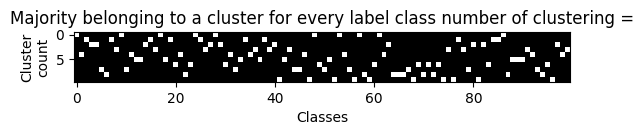

In [142]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((10,100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(c, cmap='Greys_r')

In [143]:
np.sum(c, axis=1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [144]:
false_negative = np.ma.array(a,mask=c)
sum_fn = np.sum(false_negative)
print(sum_fn/y.shape[0])

0.19656290012804098
